# **Projeto de Análise de Dados do Censo Demográfico 2010**

**Nome:** Lilian Gimenez Teixeira  
**RA:** 11202332321  
**Turma:** C2  

Primeiro faremos a importação das libs que usaremos:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

Agora, vamos **carregar as bases** que usaremos ao longo do código:

In [13]:
df_pop = pd.read_csv('pop_residente_2010.csv', sep=';')
df_instrucao = pd.read_csv('nivel_instrucao_2010.csv', sep=';')
df_ocupacao = pd.read_csv('ocupacao_2010.csv', sep=';')
df_renda = pd.read_csv('renda_2010.csv', sep=';')
df_agua = pd.read_csv('agua_2010.csv', sep=';')

## **Vamos analisar o total de residentes por estado?**
Esse é um primeiro passo promissor para fazermos nossas análises!

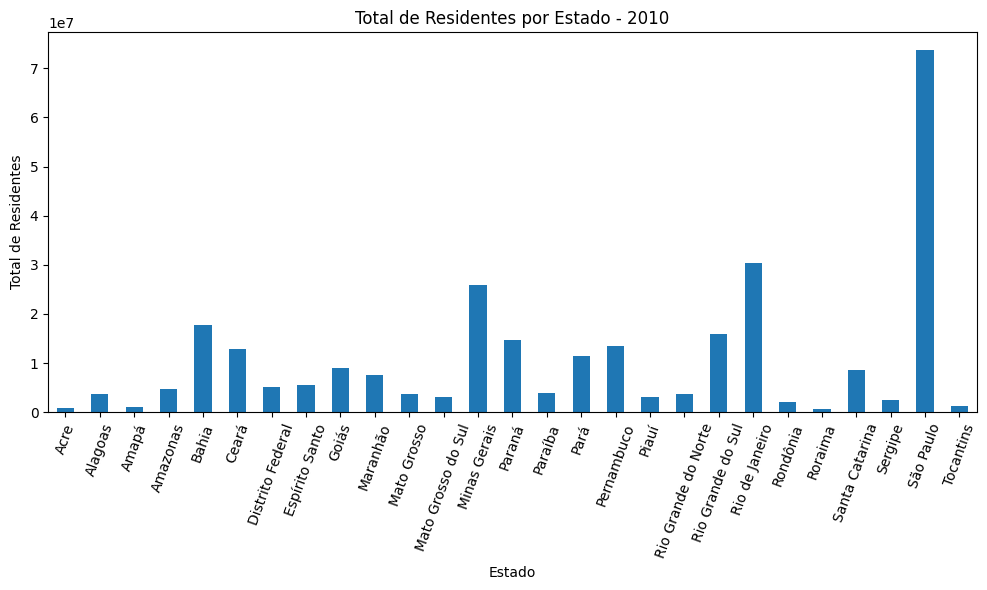

In [18]:
# Agrupar por Estado e somar o total de residentes
residents_by_state = df_pop.groupby('Estado')['Total Residente'].sum()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
residents_by_state.plot(kind='bar')
plt.title('Total de Residentes por Estado - 2010')
plt.xlabel('Estado')
plt.ylabel('Total de Residentes')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

Uau! Com o gráfico acima podemos notar que o **estado de São Paulo é disparado o estado com maior população**.
Que tal analisarmos o nível de instrução de todos os estados e criar uma relação entre ela e número de residentes por estado?

## **Analisando a proporção de nível de instrução por estado**
Para podermos analisar de forma mais intuitiva a proporção da população do estado em relação a um nível de instrução, faz sentido que **normalizemos os dados no gráfico**...

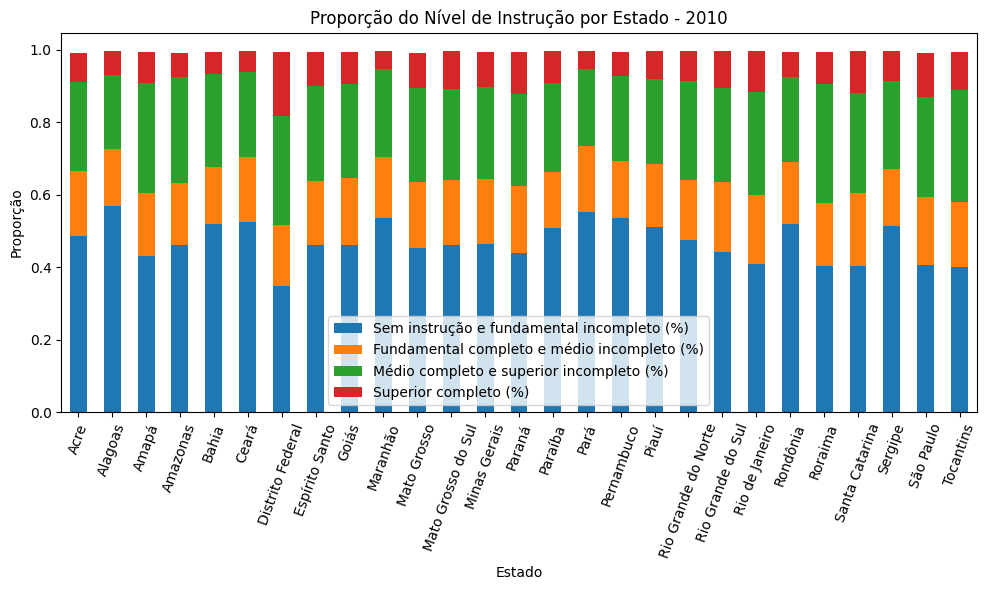

In [29]:
# Agrupar por Estado e somar os níveis de instrução
education_by_state = df_instrucao.groupby('Estado').sum()

# Calcular as proporções para cada nível de instrução
education_by_state['Sem instrução e fundamental incompleto (%)'] = education_by_state['Sem instrução e fundamental incompleto'] / education_by_state['Total pessoas > 10 anos']
education_by_state['Fundamental completo e médio incompleto (%)'] = education_by_state['Fundamental completo e médio incompleto'] / education_by_state['Total pessoas > 10 anos']
education_by_state['Médio completo e superior incompleto (%)'] = education_by_state['Médio completo e superior incompleto'] / education_by_state['Total pessoas > 10 anos']
education_by_state['Superior completo (%)'] = education_by_state['Superior completo'] / education_by_state['Total pessoas > 10 anos']

# Plotar o gráfico de barras empilhadas com as proporções
education_by_state[['Sem instrução e fundamental incompleto (%)', 
                    'Fundamental completo e médio incompleto (%)', 
                    'Médio completo e superior incompleto (%)', 
                    'Superior completo (%)']].plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Proporção do Nível de Instrução por Estado - 2010')
plt.xlabel('Estado')
plt.ylabel('Proporção')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()


